In [1]:
## Libraries
import pandas as pd
import numpy as np
import nltk as nl
import sklearn as sk
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
## Import IFor-Hire Vehicle Trip Records January
FHTVJ = pd.read_parquet("https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-01.parquet")

In [3]:
FHTVJ

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037
...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285


In [4]:
## Import IFor-Hire Vehicle Trip Records February
FHTVF = pd.read_parquet("https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet")

In [5]:
FHTVF

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00013,2021-02-01 00:01:00,2021-02-01 01:33:00,NaN,NaN,None,B00014
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,None,B00021
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,None,B00021
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82.0,129.0,None,B00021
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,NaN,225.0,None,B00037
...,...,...,...,...,...,...,...
1037687,B03282,2021-02-28 23:01:16,2021-02-28 23:14:48,NaN,31.0,None,B01717
1037688,B03282,2021-02-28 23:36:10,2021-02-28 23:47:38,NaN,169.0,None,B01717
1037689,B03285,2021-02-28 23:18:36,2021-02-28 23:43:59,28.0,171.0,None,B03285
1037690,B03285,2021-02-28 23:26:34,2021-02-28 23:44:37,16.0,252.0,None,B03285


In [6]:
## Question 1
### 1154112

In [7]:
## Question 2
FHTVJ ["duration"] = (FHTVJ.dropOff_datetime - FHTVJ.pickup_datetime) / pd.Timedelta('1 minute')

In [8]:
FHTVJ

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,110.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667
...,...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266,8.750000
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,,57.600000
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285,16.200000
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285,19.433333


In [9]:
## Question 2 Mean
mean_duration = FHTVJ['duration'].mean()
print(mean_duration)

19.1672240937939


In [10]:
## Take out columns
FHTVJ1 = FHTVJ[FHTVJ['duration'] <= 60]

In [11]:
FHTVJ1

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,NaN,71.0,None,B00037,9.050000
...,...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266,8.750000
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,,57.600000
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285,16.200000
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285,19.433333


In [12]:
## Answer 3
Answer3 = 1154112 - 1124850
Answer3

29262

In [13]:
## Question 4 Relace NAs in PU and Do columns
FHTVJ1['PUlocationID']=FHTVJ1['PUlocationID'].replace(np.nan, -1)
FHTVJ1['DOlocationID']=FHTVJ1['DOlocationID'].replace(np.nan, -1)


<ipython-input-13-b837a55ac457>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FHTVJ1['PUlocationID']=FHTVJ1['PUlocationID'].replace(np.nan, -1)
<ipython-input-13-b837a55ac457>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FHTVJ1['DOlocationID']=FHTVJ1['DOlocationID'].replace(np.nan, -1)


In [14]:
FHTVJ1

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,-1.0,-1.0,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,-1.0,-1.0,None,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,-1.0,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,-1.0,61.0,None,B00037,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,-1.0,71.0,None,B00037,9.050000
...,...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266,8.750000
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,,57.600000
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285,16.200000
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285,19.433333


In [15]:
## Counts values with -1
Answer4 = FHTVJ1['PUlocationID'].value_counts()[-1.0]

In [16]:
## Percentage answer 4
(Answer4/1124850) * 100

83.18504689514158

In [17]:
## Question 5

categorical = ['PUlocationID', 'DOlocationID']

In [18]:
FHTVJ1[categorical].dtypes
FHTVJ1[categorical] = FHTVJ1[categorical].astype(str)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [19]:
## Train model

train = FHTVJ1[categorical].to_dict(orient='records')


In [20]:
## Vectorize the train DF
DV = DictVectorizer()
X_train = DV.fit_transform(train)

In [21]:
## Answer 5 = 525
X_train

<1124850x525 sparse matrix of type '<class 'numpy.float64'>'
	with 2249700 stored elements in Compressed Sparse Row format>

In [22]:
## Stablish the dependent variable as y variable
target = 'duration'
y_train = FHTVJ1[target].values

In [23]:
y_train

array([17.        , 17.        ,  8.28333333, ..., 16.2       ,
       19.43333333, 36.        ])

In [24]:
## Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
## Predict the y variable
y_pred = lr.predict(X_train)

In [26]:
y_pred

array([22.91415129, 22.91415129, 14.0839001 , ..., 15.60694532,
        9.97270543, 22.91415129])

In [27]:
## MSQE = 10.62
mean_squared_error(y_train, y_pred, squared=False)

10.629704061671607

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


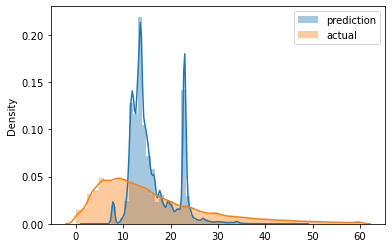

In [28]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [33]:
## Test data  
FHTVF = pd.read_parquet("https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet")
FHTVF ["duration"] = (FHTVF.dropOff_datetime - FHTVF.pickup_datetime) / pd.Timedelta('1 minute')
FHTVF = FHTVF[FHTVF['duration'] <= 60]
FHTVF['PUlocationID']=FHTVF['PUlocationID'].replace(np.nan, -1)
FHTVF['DOlocationID']=FHTVF['DOlocationID'].replace(np.nan, -1)
categorical1 = ['PUlocationID', 'DOlocationID']
FHTVF[categorical1] = FHTVF[categorical1].astype(str)

In [ ]:
FHTVF

In [35]:
## Validation model 

test_dicts = FHTVF[categorical1].to_dict(orient='records')

dt = DictVectorizer()
X_test = dt.fit_transform(test_dicts)

target = 'duration'
y_test = FHTVF[target].values

lr = LinearRegression()
lr.fit(X_test, y_test)

y_pred_test = lr.predict(X_test)



11.05892761978041

In [37]:
## Answer 6 = 11.05
mean_squared_error(y_test, y_pred_test, squared=False)

11.05892761978041

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


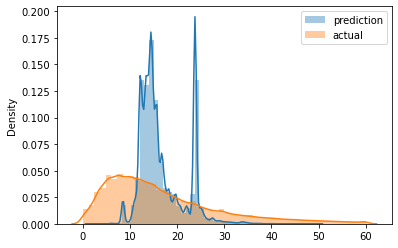

In [36]:
sns.distplot(y_pred_test, label='prediction')
sns.distplot(y_test, label='actual')

plt.legend()